# MAE6226 Homework 9

Li Lin

In [2]:
import math
import numpy as np
import numpy as np
np.set_printoptions(threshold=np.inf)
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import integrate

## Problem 1

In [3]:
def JT(zeta, c):
    
    z = zeta+c**2/zeta
    
    return z

In [4]:
def Solve_m_delta(H,T):
    
    delta = math.atan(H/T*3*math.sqrt(3)/2)
    if delta<(math.pi/2):
        delta = math.pi-delta
    m = abs(T/(3*math.sqrt(3))/math.cos(delta))
    
    return delta, m

In [6]:
def BuildFoil(delta, m, l):
    
    c = l/4
    epsilon = m/c
    r0 = math.sqrt(m**2+c**2-2*m*c*math.cos(delta))
    Nr = 1
    Ngamma = 21
    rn = 0.8
    r = np.linspace(r0, rn, Nr)
    gamma = np.linspace(0, 2*math.pi, Ngamma)
    R, Gamma = np.meshgrid(r, gamma)
    zeta = R*np.exp(1j*Gamma)+m*np.exp(1j*delta)
    z = JT(zeta, c)
    
    return z

In [7]:
N = 100
x0,xn = -1.0,1.0
y0,yn = -1.0,1.0
x = np.linspace(x0,xn,N)
y = np.linspace(y0,yn,N)
X,Y = np.meshgrid(x,y)

In [11]:
class Panel:
    """Contains information related to a panel."""
    def __init__(self, xa, ya, xb, yb):
        """Initializes the panel.
        
        Arguments
        ---------
        xa, ya -- coordinates of the first end-point of the panel.
        xb, yb -- coordinates of the second end-point of the panel.
        """
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2       # control-point (center-point)
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)     # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
            
        self.unor = 1*math.cos(self.beta)
        self.vnor = 1*math.sin(self.beta)
        self.utan = 1*math.cos(math.pi/2+self.beta)
        self.vtan = 1*math.sin(+math.pi/2+self.beta)
        
        self.sigma = 0.                             # source strength
        self.vt = 0.                                # tangential velocity
        self.cp = 0.                                # pressure coefficient


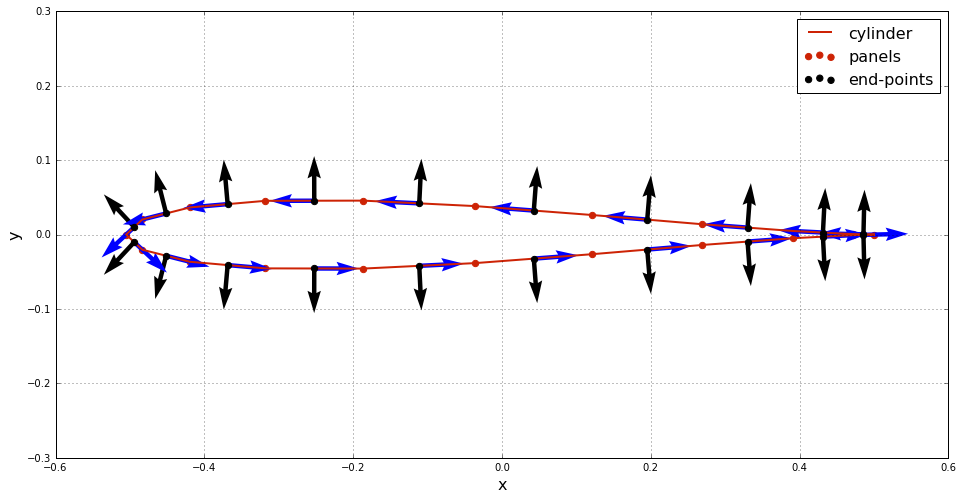

In [27]:
c = 1.0
T = 0.1
H = 0
delta, m = Solve_m_delta(H,T)
z = BuildFoil(delta, m, c)
N_panels = 20
panels = np.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(z.real[i], z.imag[i], z.real[i+1], z.imag[i+1])

size = 16
plt.figure(figsize=(size, size/2))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(z.real, z.imag, color='#CD2305', linestyle='-', linewidth=2)
plt.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
plt.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', s=40, zorder=3)
plt.quiver([p.xc for p in panels], [p.yc for p in panels], [p.unor for p in panels], [p.vnor for p in panels], \
           scale = 20, width = 0.005)
plt.quiver([p.xc for p in panels], [p.yc for p in panels], [p.utan for p in panels], [p.vtan for p in panels], \
           scale = 20, width = 0.005, color = 'b')
plt.legend(['cylinder', 'panels', 'end-points'], loc='best', prop={'size':16})
plt.xlim(-0.6,0.6)
plt.ylim(-0.3,0.3);

## Problem 2

In [62]:
def get_source_panel_velocity(p,x,y):
    """
    Evaluates the velocity components induced at coordinates (x, y) by a panel p.
    
    Arguments:
    p - panel from which the velocity is induced
    x - x-coordinate in global frame
    y - y-coordinate in global frame
    
    Returns:
    (u,v) - components of velocity at (x,y)
    """
    
    sigma = 1    # strength of the source-sheet
    k = math.tan(p.beta+math.pi/2.0)
    
    integrand = lambda s : (x-s)/((x-s)**2+(y-k*s)**2)
    u = sigma/(2*math.pi)*integrate.quad(integrand, p.xa, p.xb)[0]
    integrand = lambda s: (y-k*s)/((x-s)**2+(y-k*s)**2)
    v = sigma/(2*math.pi)*integrate.quad(integrand, p.xa, p.xb)[0]

    return u, v

    

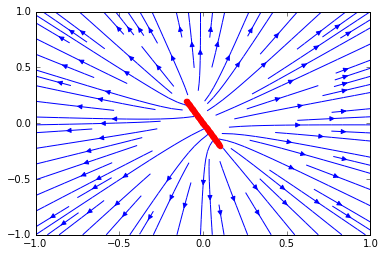

In [70]:
N = 50
x0,xn = -1.0,1.0
y0,yn = -1.0,1.0
x = np.linspace(x0,xn,N)
y = np.linspace(y0,yn,N)
X,Y = np.meshgrid(x,y)
px0, pxn = -0.1,0.1
py0, pyn = 0.2,-0.2
p = Panel(px0,py0,pxn,pyn)
u = np.empty((N, N), dtype=float)
v = np.empty((N, N), dtype=float)
for i in range (N):
    for j in range (N):
        u[i,j], v[i,j] = get_source_panel_velocity(p,X[i,j],Y[i,j])
plt.streamplot (X,Y,u,v)
px = np.linspace(px0,pxn,100)
py = px*(pyn-py0)/(pxn-px0)
plt.xlim(x0,xn)
plt.ylim(y0,yn)
plt.scatter (px,py,color = 'red');